Data set link: https://www.kaggle.com/competitions/quora-question-pairs/data?select=test.csv 

## EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
240693,240693,352567,352568,Hello I have completed Bsc. in mathematics (co...,How can I pursue a career in computer forensic...,0
296231,296231,15340,16643,What are some real life examples of Karma?,What is karma? What are some real life examples?,1
59543,59543,104263,104264,What's the best thing you learnt from Quora?,What is the one thing you have learnt from Quora?,1
207734,207734,311512,311513,How can I meet WW2 veterans?,How can I talk to a WW2 veteran?,1
114070,114070,186260,186261,How many hours should an average engineering c...,How many hours per week should you spend outsi...,0
66425,66425,115135,48230,What is the difference between c# and c++?,"What is the difference between C, C++ and C#?",0
220430,220430,211241,236671,What is your favorite app on your phone?,What is you favorite app on your phone? Why?,1
72183,72183,118653,124082,How is Christmas celebrated?,How is Christmas celebrated in the Netherlands?,0
344425,344425,44973,472650,"How many is few, couple, and several?","What is the difference between ""a few"" and ""fe...",0
355959,355959,187245,247460,Which is the best training company for Java in...,What are the best Java Training company in Ban...,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

We can drop these null value records

In [6]:
df = df.dropna()
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [7]:
df.duplicated().sum()

0

In [8]:
df["is_duplicate"].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

In [9]:
df["is_duplicate"].value_counts()/df["is_duplicate"].count()*100

0    63.079941
1    36.920059
Name: is_duplicate, dtype: float64

<Axes: >

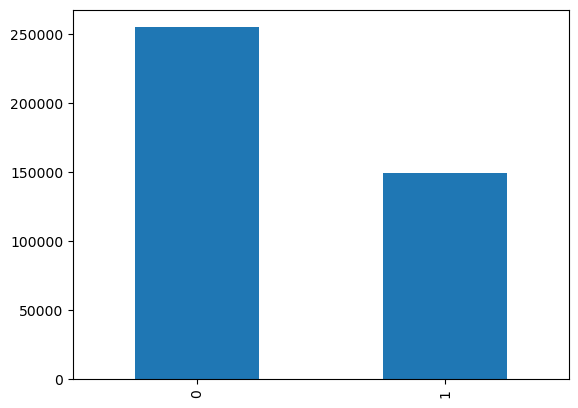

In [10]:
df["is_duplicate"].value_counts().plot(kind = "bar")

Finding number of unique questions and repeated questions

In [11]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [12]:
df["qid1"].value_counts()

8461      50
14110     48
25984     47
20628     47
1749      47
          ..
223036     1
223037     1
223039     1
223041     1
537932     1
Name: qid1, Length: 290652, dtype: int64

In [13]:
df["qid1"].tolist()

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 23,
 25,
 27,
 29,
 31,
 33,
 35,
 37,
 39,
 41,
 43,
 45,
 47,
 49,
 51,
 53,
 55,
 57,
 59,
 61,
 63,
 65,
 67,
 69,
 71,
 73,
 75,
 77,
 79,
 81,
 83,
 85,
 87,
 89,
 91,
 93,
 95,
 97,
 99,
 101,
 103,
 105,
 107,
 109,
 111,
 113,
 115,
 117,
 119,
 121,
 123,
 125,
 127,
 129,
 131,
 133,
 135,
 137,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 163,
 165,
 167,
 169,
 171,
 173,
 175,
 177,
 179,
 181,
 183,
 185,
 187,
 189,
 191,
 193,
 195,
 197,
 199,
 201,
 203,
 205,
 207,
 209,
 211,
 213,
 215,
 217,
 219,
 221,
 223,
 225,
 227,
 229,
 231,
 233,
 235,
 237,
 239,
 241,
 243,
 245,
 247,
 249,
 251,
 253,
 255,
 257,
 259,
 261,
 263,
 265,
 267,
 269,
 271,
 273,
 275,
 277,
 279,
 281,
 283,
 285,
 287,
 289,
 291,
 293,
 295,
 297,
 299,
 301,
 303,
 305,
 307,
 309,
 311,
 313,
 315,
 317,
 319,
 321,
 323,
 325,
 327,
 329,
 331,
 333,
 335,
 337,
 339,
 341,
 343,
 345,
 347,
 349,
 351,

In [14]:
df["qid2"].tolist()

[2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 58,
 60,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 86,
 88,
 90,
 92,
 94,
 96,
 98,
 100,
 102,
 104,
 106,
 108,
 110,
 112,
 114,
 116,
 118,
 120,
 122,
 124,
 126,
 128,
 130,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 154,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198,
 200,
 202,
 204,
 206,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 224,
 226,
 228,
 230,
 232,
 234,
 236,
 238,
 240,
 242,
 244,
 246,
 248,
 250,
 252,
 254,
 256,
 258,
 260,
 262,
 264,
 266,
 268,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 288,
 290,
 292,
 294,
 296,
 298,
 300,
 302,
 304,
 306,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 324,
 326,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 342,
 344,
 346,
 348,
 350,
 35

In [15]:
qid = pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
qid

0              1
1              3
2              5
3              7
4              9
           ...  
808569    379845
808570    155606
808571    537929
808572    537931
808573    537933
Length: 808574, dtype: int64

We can find out number of unique questions by making a set out of this list

In [16]:
set1 = set(qid)
len(set1)

537929

In [17]:
print("Number of unique questions", np.unique(qid).shape[0])

Number of unique questions 537929


In [18]:
x = qid.value_counts() > 1
x

2559       True
30782      True
4044       True
2561       True
14376      True
          ...  
416446    False
416444    False
416441    False
416439    False
537933    False
Length: 537929, dtype: bool

In [19]:
print("Number of question getting repeated", x[x].shape[0])

Number of question getting repeated 111778


So, out of total 8 Lakh questions only 5 Lakh are unique and around 1 lakh something questions are having duplicates 

Repeated questions histogram

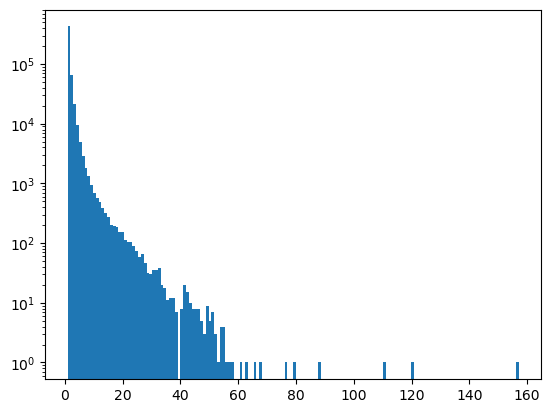

In [20]:
plt.hist(qid.value_counts().values, bins = 160)
plt.yscale("log")
plt.show()

So, most of the questions are being repeated only once but some of the questions are being repeated close to 160 times

In [21]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [22]:
df["question1"][0]

'What is the step by step guide to invest in share market in india?'

In [23]:
df["question2"][0]

'What is the step by step guide to invest in share market?'

## Text Vectorization and Model Building Simple Approach

Let us apply bag of words to the two input columns question1 and question2 directly without doing any text preprocessing and we will see how the accuracy score is:

We will not take the whole dataset of 4 lakhs records, Let us take sample of 30,000 records to save training time

In [24]:
df_new = df.sample(30000)
df_new

,id,qid1,qid2,question1,question2,is_duplicate
389018,389018,280540,521455,What do soldiers keep in all those pockets the...,Is it harmful for your body to keep your iPhon...,0
188396,188396,286916,286917,My doctor lied to me about hairline fracture a...,My boyfriend put his penis in me and took it o...,0
300425,300425,423211,423212,A girl randomly stops replying to me while we'...,What does it mean if a girl stops replying to ...,0
191532,191532,290905,142622,Which is a good solar panel installation provi...,Which is a suitable solar panel installation p...,0
246234,246234,268959,125629,How can I successfully get multiple streams of...,How can one earn multiple streams of income on...,0
...,...,...,...,...,...,...
354708,354708,345376,483856,Which gland works both as an endocrine and exo...,What are ductless glands in the endocrine system?,0
380344,380344,511956,434105,How do molecular compounds and ionic compounds...,Is SO2 an ionic compound?,0
331027,331027,457862,457863,What are good toys for children?,What toys help develop visual-spatial ability ...,0
100129,100129,166137,166138,What are some examples of ethical dilemmas?,What is an ethical dilemma? What are examples ...,1


Making dataframe of the two input columns

In [25]:
input_df = df_new[["question1", "question2"]]
input_df

,question1,question2
389018,What do soldiers keep in all those pockets the...,Is it harmful for your body to keep your iPhon...
188396,My doctor lied to me about hairline fracture a...,My boyfriend put his penis in me and took it o...
300425,A girl randomly stops replying to me while we'...,What does it mean if a girl stops replying to ...
191532,Which is a good solar panel installation provi...,Which is a suitable solar panel installation p...
246234,How can I successfully get multiple streams of...,How can one earn multiple streams of income on...
...,...,...
354708,Which gland works both as an endocrine and exo...,What are ductless glands in the endocrine system?
380344,How do molecular compounds and ionic compounds...,Is SO2 an ionic compound?
331027,What are good toys for children?,What toys help develop visual-spatial ability ...
100129,What are some examples of ethical dilemmas?,What is an ethical dilemma? What are examples ...


### Using Bag of words text vectorization technique

In [26]:
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
questions_list = list(input_df["question1"]) + list(input_df["question2"])
questions_list

['What do soldiers keep in all those pockets they have?',
 'My doctor lied to me about hairline fracture and then changed his diagnosis the day after. I found out 3 weeks later. What can I do?',
 "A girl randomly stops replying to me while we're texting each other. Does this mean she doesn't like me?",
 'Which is a good solar panel installation provider near Florence, Arizona AZ?',
 'How can I successfully get multiple streams of income?',
 'Which is a good inpatient drug and alcohol rehab center near Camden County GA?',
 'Are non living sub atomic particles conscious?',
 'What will be the impact of banning Rs. 500, Rs. 1000 notes on Indian economy and Businesses?',
 'Which is the best time for workout? Morning or evening?',
 'If you voted for Donald Trump, why did you vote for him?',
 'How does the stock market work generally?',
 "How is the word 'libel' used in a sentence?",
 'What are some books that changed your perspective on life?',
 'What is work life balance?',
 'What is a neut

We will just make 3000 dimension vector to save some memory and time (basically using the most frequent 3000 words)

In [28]:
cv = CountVectorizer(max_features=3000)

In [29]:
vectors = cv.fit_transform(questions_list).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

Anyway, this will also be a sparse array only

In [30]:
len(vectors)

60000

In [31]:
vectors[0].shape

(3000,)

In [32]:
q1_arr, q2_arr = np.vsplit(vectors, 2)

In [33]:
len(q1_arr)

30000

In [34]:
len(q2_arr)

30000

In [35]:
tempdf1 = pd.DataFrame(q1_arr, index = input_df.index)
tempdf1

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
389018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
188396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
tempdf2 = pd.DataFrame(q2_arr, index = input_df.index)
tempdf2

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
389018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
188396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331027,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
tempdf = pd.concat([tempdf1, tempdf2], axis = 1)
tempdf

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
389018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,3,0,0,0,0,0,0
188396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331027,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
100129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


So, this is the final input dataframe that we can use having 6000 features and 30,000 records

We can add the target column to this dataframe now

In [38]:
df_new["is_duplicate"]

389018    0
188396    0
300425    0
191532    0
246234    0
         ..
354708    0
380344    0
331027    0
100129    1
198243    0
Name: is_duplicate, Length: 30000, dtype: int64

In [39]:
tempdf["is_duplicate"] = df_new["is_duplicate"]
tempdf

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
389018,0,0,0,0,0,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,0
188396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
300425,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331027,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
100129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## We will do some feature engineering 

We can make some useful features like:

1. #char in ques1
2. #char in ques2
3. #words in ques1
4. #words in ques2
5. #words common
6. #total words in together
7. common words/total words



In [40]:
input_df

,question1,question2
389018,What do soldiers keep in all those pockets the...,Is it harmful for your body to keep your iPhon...
188396,My doctor lied to me about hairline fracture a...,My boyfriend put his penis in me and took it o...
300425,A girl randomly stops replying to me while we'...,What does it mean if a girl stops replying to ...
191532,Which is a good solar panel installation provi...,Which is a suitable solar panel installation p...
246234,How can I successfully get multiple streams of...,How can one earn multiple streams of income on...
...,...,...
354708,Which gland works both as an endocrine and exo...,What are ductless glands in the endocrine system?
380344,How do molecular compounds and ionic compounds...,Is SO2 an ionic compound?
331027,What are good toys for children?,What toys help develop visual-spatial ability ...
100129,What are some examples of ethical dilemmas?,What is an ethical dilemma? What are examples ...


In [41]:
input_df["q1_len"] = input_df["question1"].str.len()
input_df["q2_len"] = input_df["question2"].str.len()

input_df

C:\Users\rajat.chauhan\AppData\Local\Temp\ipykernel_13516\1390627724.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df["q1_len"] = input_df["question1"].str.len()
C:\Users\rajat.chauhan\AppData\Local\Temp\ipykernel_13516\1390627724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df["q2_len"] = input_df["question2"].str.len()


,question1,question2,q1_len,q2_len
389018,What do soldiers keep in all those pockets the...,Is it harmful for your body to keep your iPhon...,53,63
188396,My doctor lied to me about hairline fracture a...,My boyfriend put his penis in me and took it o...,132,124
300425,A girl randomly stops replying to me while we'...,What does it mean if a girl stops replying to ...,104,127
191532,Which is a good solar panel installation provi...,Which is a suitable solar panel installation p...,76,80
246234,How can I successfully get multiple streams of...,How can one earn multiple streams of income on...,54,51
...,...,...,...,...
354708,Which gland works both as an endocrine and exo...,What are ductless glands in the endocrine system?,58,49
380344,How do molecular compounds and ionic compounds...,Is SO2 an ionic compound?,65,25
331027,What are good toys for children?,What toys help develop visual-spatial ability ...,32,64
100129,What are some examples of ethical dilemmas?,What is an ethical dilemma? What are examples ...,43,54


In [42]:
input_df["q1_num_words"] = input_df["question1"].apply(lambda row: len(row.split(" ")))
input_df["q2_num_words"] = input_df["question2"].apply(lambda row: len(row.split(" ")))

input_df.head()

C:\Users\rajat.chauhan\AppData\Local\Temp\ipykernel_13516\4144480847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input_df["q1_num_words"] = input_df["question1"].apply(lambda row: len(row.split(" ")))


,question1,question2,q1_len,q2_len,q1_num_words,q2_num_words
389018,What do soldiers keep in all those pockets the...,Is it harmful for your body to keep your iPhon...,53,63,10,13
188396,My doctor lied to me about hairline fracture a...,My boyfriend put his penis in me and took it o...,132,124,26,26
300425,A girl randomly stops replying to me while we'...,What does it mean if a girl stops replying to ...,104,127,19,24
191532,Which is a good solar panel installation provi...,Which is a suitable solar panel installation p...,76,80,12,12
246234,How can I successfully get multiple streams of...,How can one earn multiple streams of income on...,54,51,9,9


Now, we need to find out count of common words between these two questions. This can be achieved by using set

In [43]:
str1 = df["question1"][0].split(" ")
str1

['What',
 'is',
 'the',
 'step',
 'by',
 'step',
 'guide',
 'to',
 'invest',
 'in',
 'share',
 'market',
 'in',
 'india?']

Here words "in" and "step" are used two times

In [44]:
set1 = set(str1)
set1

{'What',
 'by',
 'guide',
 'in',
 'india?',
 'invest',
 'is',
 'market',
 'share',
 'step',
 'the',
 'to'}

In [45]:
str2 = df["question2"][0].split(" ")
str2

['What',
 'is',
 'the',
 'step',
 'by',
 'step',
 'guide',
 'to',
 'invest',
 'in',
 'share',
 'market?']

In [46]:
set2 = set(str2)
set2

{'What',
 'by',
 'guide',
 'in',
 'invest',
 'is',
 'market?',
 'share',
 'step',
 'the',
 'to'}

In [47]:
set1 & set2

{'What', 'by', 'guide', 'in', 'invest', 'is', 'share', 'step', 'the', 'to'}

In [48]:
set1 - set2

{'india?', 'market'}

In [49]:
set2 - set1

{'market?'}

In [50]:
len(set1 & set2)

10

In [51]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(" ") ))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" ") ))
    return len(w1 & w2)

In [52]:
input_df["num_common_words"] = input_df.apply(common_words, axis = 1)
input_df

,question1,question2,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words
389018,What do soldiers keep in all those pockets the...,Is it harmful for your body to keep your iPhon...,53,63,10,13,2
188396,My doctor lied to me about hairline fracture a...,My boyfriend put his penis in me and took it o...,132,124,26,26,8
300425,A girl randomly stops replying to me while we'...,What does it mean if a girl stops replying to ...,104,127,19,24,8
191532,Which is a good solar panel installation provi...,Which is a suitable solar panel installation p...,76,80,12,12,10
246234,How can I successfully get multiple streams of...,How can one earn multiple streams of income on...,54,51,9,9,5
...,...,...,...,...,...,...,...
354708,Which gland works both as an endocrine and exo...,What are ductless glands in the endocrine system?,58,49,10,8,1
380344,How do molecular compounds and ionic compounds...,Is SO2 an ionic compound?,65,25,10,5,1
331027,What are good toys for children?,What toys help develop visual-spatial ability ...,32,64,6,9,3
100129,What are some examples of ethical dilemmas?,What is an ethical dilemma? What are examples ...,43,54,7,10,5


In [53]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(" ") ))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" ") ))
    return len(w1) + len(w2)

In [54]:
input_df["total_words"] = input_df.apply(total_words, axis = 1)
input_df

,question1,question2,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,total_words
389018,What do soldiers keep in all those pockets the...,Is it harmful for your body to keep your iPhon...,53,63,10,13,2,21
188396,My doctor lied to me about hairline fracture a...,My boyfriend put his penis in me and took it o...,132,124,26,26,8,49
300425,A girl randomly stops replying to me while we'...,What does it mean if a girl stops replying to ...,104,127,19,24,8,42
191532,Which is a good solar panel installation provi...,Which is a suitable solar panel installation p...,76,80,12,12,10,24
246234,How can I successfully get multiple streams of...,How can one earn multiple streams of income on...,54,51,9,9,5,18
...,...,...,...,...,...,...,...,...
354708,Which gland works both as an endocrine and exo...,What are ductless glands in the endocrine system?,58,49,10,8,1,18
380344,How do molecular compounds and ionic compounds...,Is SO2 an ionic compound?,65,25,10,5,1,14
331027,What are good toys for children?,What toys help develop visual-spatial ability ...,32,64,6,9,3,15
100129,What are some examples of ethical dilemmas?,What is an ethical dilemma? What are examples ...,43,54,7,10,5,16


In [55]:
input_df["word_share"] = round(input_df["num_common_words"]/input_df["total_words"],2)
input_df

,question1,question2,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,total_words,word_share
389018,What do soldiers keep in all those pockets the...,Is it harmful for your body to keep your iPhon...,53,63,10,13,2,21,0.10
188396,My doctor lied to me about hairline fracture a...,My boyfriend put his penis in me and took it o...,132,124,26,26,8,49,0.16
300425,A girl randomly stops replying to me while we'...,What does it mean if a girl stops replying to ...,104,127,19,24,8,42,0.19
191532,Which is a good solar panel installation provi...,Which is a suitable solar panel installation p...,76,80,12,12,10,24,0.42
246234,How can I successfully get multiple streams of...,How can one earn multiple streams of income on...,54,51,9,9,5,18,0.28
...,...,...,...,...,...,...,...,...,...
354708,Which gland works both as an endocrine and exo...,What are ductless glands in the endocrine system?,58,49,10,8,1,18,0.06
380344,How do molecular compounds and ionic compounds...,Is SO2 an ionic compound?,65,25,10,5,1,14,0.07
331027,What are good toys for children?,What toys help develop visual-spatial ability ...,32,64,6,9,3,15,0.20
100129,What are some examples of ethical dilemmas?,What is an ethical dilemma? What are examples ...,43,54,7,10,5,16,0.31


## Removing outliers

In [60]:
print(input_df["q1_len"].min())
print(input_df["q1_len"].max())
print(input_df["q1_len"].mean())
print(input_df["q1_len"].median())

3
350
59.69186666666667
52.0


In [74]:
Q1 = input_df["q1_len"].quantile(0.25)
Q1

39.0

In [75]:
Q3 = input_df["q1_len"].quantile(0.75)
Q3

72.0

In [76]:
IQR = Q3 - Q1
IQR

33.0

In [77]:
lower_bound = Q1 - 1.5 * IQR
lower_bound

-10.5

In [78]:
upper_bound = Q3 + 1.5 * IQR
upper_bound

121.5

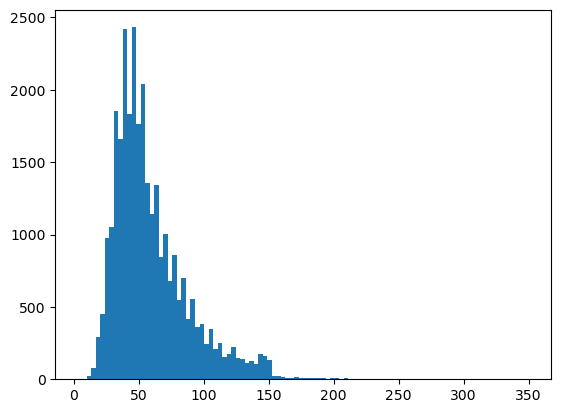

In [57]:
plt.hist(input_df["q1_len"], bins = 100)
plt.show()

In [61]:
print(input_df["q2_len"].min())
print(input_df["q2_len"].max())
print(input_df["q2_len"].mean())
print(input_df["q2_len"].median())

4
581
60.17476666666666
51.0


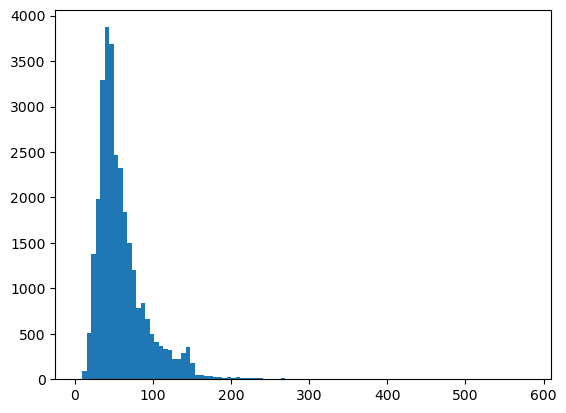

In [62]:
plt.hist(input_df["q2_len"], bins = 100)
plt.show()

Minimum question 4 is still fine I think but upper limit is very high, as per the above distribution it make sense to cut it to around 200 words maybe

In [63]:
Q1 = input_df["q2_len"].quantile(0.25)
Q1

39.0

In [64]:
Q3 = input_df["q2_len"].quantile(0.75)
Q3

72.0

In [65]:
IQR = Q3 - Q1

In [66]:
lower_bound = Q1 - 1.5 * IQR
lower_bound

-10.5

In [68]:
upper_bound = Q3 + 1.5 * IQR
upper_bound

121.5

In [81]:
# Get indices of outliers of question 2
outlier_indices = (input_df["q2_len"] < lower_bound) | (input_df["q2_len"] > upper_bound)
outlier_indices

389018    False
188396     True
300425     True
191532    False
246234    False
          ...  
354708    False
380344    False
331027    False
100129    False
198243    False
Name: q2_len, Length: 30000, dtype: bool

In [82]:
# Remove outliers from the DataFrame
df_no_outliers = input_df[~outlier_indices]
df_no_outliers

,question1,question2,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,total_words,word_share
389018,What do soldiers keep in all those pockets the...,Is it harmful for your body to keep your iPhon...,53,63,10,13,2,21,0.10
191532,Which is a good solar panel installation provi...,Which is a suitable solar panel installation p...,76,80,12,12,10,24,0.42
246234,How can I successfully get multiple streams of...,How can one earn multiple streams of income on...,54,51,9,9,5,18,0.28
131034,Which is a good inpatient drug and alcohol reh...,Which is a suitable inpatient drug and alcohol...,78,81,14,14,12,28,0.43
7925,Are non living sub atomic particles conscious?,"Physics: Are cells made up of atoms? If so, wh...",46,90,7,16,3,23,0.13
...,...,...,...,...,...,...,...,...,...
354708,Which gland works both as an endocrine and exo...,What are ductless glands in the endocrine system?,58,49,10,8,1,18,0.06
380344,How do molecular compounds and ionic compounds...,Is SO2 an ionic compound?,65,25,10,5,1,14,0.07
331027,What are good toys for children?,What toys help develop visual-spatial ability ...,32,64,6,9,3,15,0.20
100129,What are some examples of ethical dilemmas?,What is an ethical dilemma? What are examples ...,43,54,7,10,5,16,0.31


In [87]:
# Get indices of outliers of question 1
outlier_indices = (df_no_outliers["q1_len"] < lower_bound) | (df_no_outliers["q1_len"] > upper_bound)
outlier_indices

389018    False
191532    False
246234    False
131034    False
7925      False
          ...  
354708    False
380344    False
331027    False
100129    False
198243    False
Name: q1_len, Length: 28124, dtype: bool

In [88]:
df_no_outliers = df_no_outliers[~outlier_indices]
df_no_outliers

,question1,question2,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,total_words,word_share
389018,What do soldiers keep in all those pockets the...,Is it harmful for your body to keep your iPhon...,53,63,10,13,2,21,0.10
191532,Which is a good solar panel installation provi...,Which is a suitable solar panel installation p...,76,80,12,12,10,24,0.42
246234,How can I successfully get multiple streams of...,How can one earn multiple streams of income on...,54,51,9,9,5,18,0.28
131034,Which is a good inpatient drug and alcohol reh...,Which is a suitable inpatient drug and alcohol...,78,81,14,14,12,28,0.43
7925,Are non living sub atomic particles conscious?,"Physics: Are cells made up of atoms? If so, wh...",46,90,7,16,3,23,0.13
...,...,...,...,...,...,...,...,...,...
354708,Which gland works both as an endocrine and exo...,What are ductless glands in the endocrine system?,58,49,10,8,1,18,0.06
380344,How do molecular compounds and ionic compounds...,Is SO2 an ionic compound?,65,25,10,5,1,14,0.07
331027,What are good toys for children?,What toys help develop visual-spatial ability ...,32,64,6,9,3,15,0.20
100129,What are some examples of ethical dilemmas?,What is an ethical dilemma? What are examples ...,43,54,7,10,5,16,0.31


Perfect, so we have removed all outliers based on character lengths of question1 and question2

In [98]:
new_df = df_no_outliers[["q1_len", "q2_len", "q1_num_words", "q2_num_words", 
                                 "num_common_words", "total_words", "word_share" ]]
new_df

,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,total_words,word_share
389018,53,63,10,13,2,21,0.10
191532,76,80,12,12,10,24,0.42
246234,54,51,9,9,5,18,0.28
131034,78,81,14,14,12,28,0.43
7925,46,90,7,16,3,23,0.13
...,...,...,...,...,...,...,...
354708,58,49,10,8,1,18,0.06
380344,65,25,10,5,1,14,0.07
331027,32,64,6,9,3,15,0.20
100129,43,54,7,10,5,16,0.31


In [99]:
new_df.index

Int64Index([389018, 191532, 246234, 131034,   7925, 174170,  66551,   8268,
            304846, 300171,
            ...
             57521,  69440, 114292, 142794, 332098, 354708, 380344, 331027,
            100129, 198243],
           dtype='int64', length=27128)

In [102]:
tempdf1 = tempdf1.loc[new_df.index]
tempdf1

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
389018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
tempdf2 = tempdf2.loc[new_df.index]
tempdf2

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
389018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
191532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
131034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
380344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
331027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let us combine all the features now

In [107]:
df_combined = pd.concat([tempdf1, tempdf2,new_df ], axis = 1)
df_combined

,0,1,2,3,4,5,6,7,8,9,...,2997,2998,2999,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,total_words,word_share
389018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,53,63,10,13,2,21,0.10
191532,0,0,0,0,0,0,0,0,0,0,...,0,0,0,76,80,12,12,10,24,0.42
246234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,54,51,9,9,5,18,0.28
131034,0,0,0,0,0,0,0,0,0,0,...,0,0,0,78,81,14,14,12,28,0.43
7925,0,0,0,0,0,0,0,0,0,0,...,0,0,0,46,90,7,16,3,23,0.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354708,0,0,0,0,0,0,0,0,0,0,...,0,0,0,58,49,10,8,1,18,0.06
380344,0,0,0,0,0,0,0,0,0,0,...,0,0,0,65,25,10,5,1,14,0.07
331027,0,0,0,0,0,0,0,0,0,0,...,0,0,0,32,64,6,9,3,15,0.20
100129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,43,54,7,10,5,16,0.31


Adding the output column now

In [110]:
df_combined["is_duplicate"] = df_new.loc[df_combined.index]["is_duplicate"]
df_combined

,0,1,2,3,4,5,6,7,8,9,...,2998,2999,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,total_words,word_share,is_duplicate
389018,0,0,0,0,0,0,0,0,0,0,...,0,0,53,63,10,13,2,21,0.10,0
191532,0,0,0,0,0,0,0,0,0,0,...,0,0,76,80,12,12,10,24,0.42,0
246234,0,0,0,0,0,0,0,0,0,0,...,0,0,54,51,9,9,5,18,0.28,0
131034,0,0,0,0,0,0,0,0,0,0,...,0,0,78,81,14,14,12,28,0.43,0
7925,0,0,0,0,0,0,0,0,0,0,...,0,0,46,90,7,16,3,23,0.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354708,0,0,0,0,0,0,0,0,0,0,...,0,0,58,49,10,8,1,18,0.06,0
380344,0,0,0,0,0,0,0,0,0,0,...,0,0,65,25,10,5,1,14,0.07,0
331027,0,0,0,0,0,0,0,0,0,0,...,0,0,32,64,6,9,3,15,0.20,0
100129,0,0,0,0,0,0,0,0,0,0,...,0,0,43,54,7,10,5,16,0.31,1


## We can do some further EDA to see if the features that we created are relevant or not

C:\Users\rajat.chauhan\AppData\Local\Temp\ipykernel_13516\710191816.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_combined[df_combined['is_duplicate'] == 0]['num_common_words'],label='non duplicate')
C:\Users\rajat.chauhan\AppData\Local\Temp\ipykernel_13516\710191816.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457

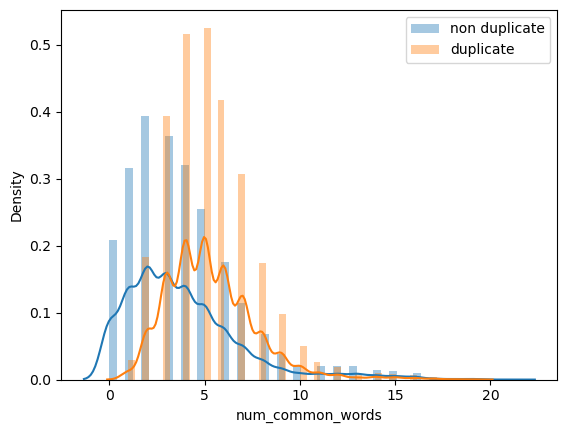

In [111]:
# common words
sns.distplot(df_combined[df_combined['is_duplicate'] == 0]['num_common_words'],label='non duplicate')
sns.distplot(df_combined[df_combined['is_duplicate'] == 1]['num_common_words'],label='duplicate')
plt.legend()
plt.show()

Clearly, number of common words have more chances of the two questions to be duplicate

C:\Users\rajat.chauhan\AppData\Local\Temp\ipykernel_13516\907994288.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_combined[df_combined['is_duplicate'] == 0]['total_words'],label='non duplicate')
C:\Users\rajat.chauhan\AppData\Local\Temp\ipykernel_13516\907994288.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637

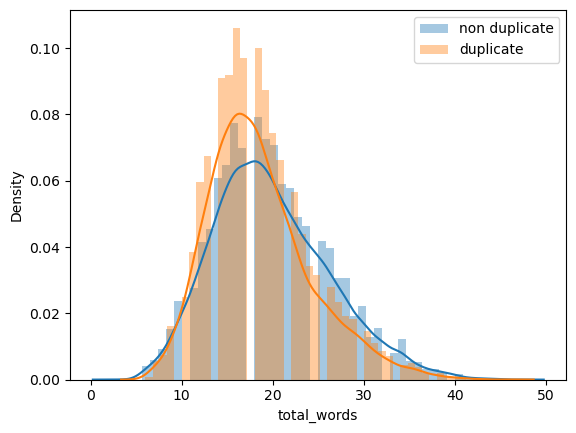

In [112]:
# total words
sns.distplot(df_combined[df_combined['is_duplicate'] == 0]['total_words'],label='non duplicate')
sns.distplot(df_combined[df_combined['is_duplicate'] == 1]['total_words'],label='duplicate')
plt.legend()
plt.show()

C:\Users\rajat.chauhan\AppData\Local\Temp\ipykernel_13516\684346540.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_combined[df_combined['is_duplicate'] == 0]['word_share'],label='non duplicate')
C:\Users\rajat.chauhan\AppData\Local\Temp\ipykernel_13516\684346540.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

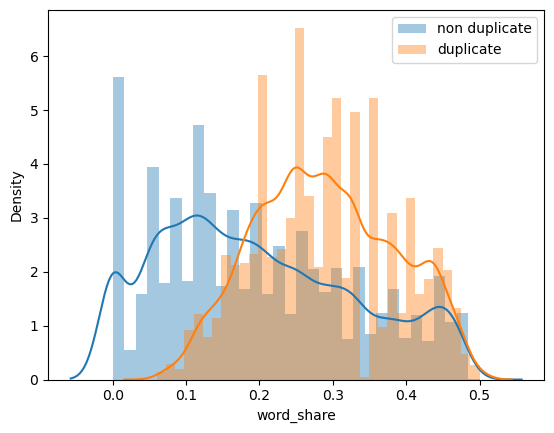

In [113]:
# word share
sns.distplot(df_combined[df_combined['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(df_combined[df_combined['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

Very useful column, we can see more the word_share more chances of the questions to be duplicate

## Trying some ML models now

In [116]:
df_combined

,0,1,2,3,4,5,6,7,8,9,...,2998,2999,q1_len,q2_len,q1_num_words,q2_num_words,num_common_words,total_words,word_share,is_duplicate
389018,0,0,0,0,0,0,0,0,0,0,...,0,0,53,63,10,13,2,21,0.10,0
191532,0,0,0,0,0,0,0,0,0,0,...,0,0,76,80,12,12,10,24,0.42,0
246234,0,0,0,0,0,0,0,0,0,0,...,0,0,54,51,9,9,5,18,0.28,0
131034,0,0,0,0,0,0,0,0,0,0,...,0,0,78,81,14,14,12,28,0.43,0
7925,0,0,0,0,0,0,0,0,0,0,...,0,0,46,90,7,16,3,23,0.13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354708,0,0,0,0,0,0,0,0,0,0,...,0,0,58,49,10,8,1,18,0.06,0
380344,0,0,0,0,0,0,0,0,0,0,...,0,0,65,25,10,5,1,14,0.07,0
331027,0,0,0,0,0,0,0,0,0,0,...,0,0,32,64,6,9,3,15,0.20,0
100129,0,0,0,0,0,0,0,0,0,0,...,0,0,43,54,7,10,5,16,0.31,1


In [117]:
X = df_combined.iloc[:,:-1].values
X

array([[ 0.  ,  0.  ,  0.  , ...,  2.  , 21.  ,  0.1 ],
       [ 0.  ,  0.  ,  0.  , ..., 10.  , 24.  ,  0.42],
       [ 0.  ,  0.  ,  0.  , ...,  5.  , 18.  ,  0.28],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  3.  , 15.  ,  0.2 ],
       [ 0.  ,  0.  ,  0.  , ...,  5.  , 16.  ,  0.31],
       [ 0.  ,  0.  ,  0.  , ...,  0.  , 21.  ,  0.  ]])

In [118]:
y = df_combined.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

## Trying some ML models now

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

 ### 1. Random Forest

In [121]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7524880206413564

Accuracy has only slightly increased